# Project: Wrangle "WeRateDogs" Twitter Data
#### By:Taima Alosaimi


## Table of Contact:
- [Introduction](#intro)
- [Data Wrangling - Gather](#Gather)
- [Data Wrangling - Assess](#Assess)
- [Data Wrangling - Clean](#Clean)
- [Storing Data](#Store)
- [Analyzing and Visualizing Data](#Analyze)



<a id='intro'></a>
## Introduction
In this project, we will Use Python and its libraries, to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, and then clean it. This is called data wrangling.

**WeRateDogs Dataset**:the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

In [1]:
# Upload necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

---------------------------------------------------------------------------------------------------

<a id='Gather'></a>
## Data Wrangling - Gather
In this project, we will work on the following three datasets:

### 1- Enhanced Twitter Archive (File on Hand)

In [2]:
#Download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2- Image Predictions File (Downloading Files from the Internet)

In [3]:
# Use OS method to check if a folder exists and create a new one if it doesn't.
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Define the url and use the requests.get method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Import the tweet image predictions TSV file into a DataFrame
image_predictions = pd.read_csv(os.path.join(folder_name, url.split('/')[-1]), sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3- Additional Data via the Twitter API (JSON)

**NOTE TO REVIEWER**: I had mobile verification issues so the following Twitter API code was sent to us from a Udacity instructor

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive_enhanced.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepyException as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [8]:
# read tweet_json.txt file line by line to create a pandas DataFrame
# to get tweet ID, retweet count, and favorite count

# List of dictionaries to build file by file and later convert to a DataFrame
tweet_json = []

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        dic = json.loads(line)

        
# Append to list of dictionaries
        tweet_json.append({'tweet_id': dic['id'],
                        'retweet_count': dic['retweet_count'],
                        'favorite_count': dic['favorite_count']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count 
tweet_json_data = pd.DataFrame(tweet_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


---------------------------------------------------------------------------------------------------

<a id='Assess'></a>
## Data Wrangling - Assess

In this section, I will detect and document the quality and tidiness issues, by using **both** visual assessment and programmatic assessment to assess the data.

One of the key points for the analysis requires that only tweets with original ratings and images, no retweets.

### 1- Enhanced Twitter Archive (File on Hand)

#### - Visual Assessment

In [9]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### - Programmatic Assessment

In [10]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
twitter_archive_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [13]:
twitter_archive_enhanced.query('rating_numerator == 5')

#in index 45 the numerator is 5 not 13.5 ---> "This is Bella. 13.5/10"

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,5,10,None,None,None,None,None
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,None,None,None
1583,687102708889812993,NaN,NaN,2016-01-13 02:43:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687102708...,5,10,None,None,None,None,None
1618,684969860808454144,6.849598e+17,4.196984e+09,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None


In [14]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive_enhanced.query('rating_denominator == 11')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [16]:
twitter_archive_enhanced['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Billy        1
Bertson      1
Sandra       1
Glenn        1
Blakely      1
Name: name, Length: 957, dtype: int64

In [17]:
twitter_archive_enhanced.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [18]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 2- Image Predictions File (Downloading Files from the Internet)

#### - Visual Assessment

In [19]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### - Programmatic Assessment

In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [23]:
image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [24]:
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
carousel                1
zebra                   1
bookcase                1
military_uniform        1
bighorn                 1
Name: p1, Length: 378, dtype: int64

### 3- Additional Data via the Twitter API (JSON)

#### - Visual Assessment

In [25]:
tweet_json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### - Programmatic Assessment

In [26]:
tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


--------------------------------------------------------------------------------------------------------------------

## Assessment Result:

### Quality

#### Enhanced Twitter Archive:
1. delete rows with non empty 'retweeted' and  'in_reply' columns  
2. delete rows with missing 'expanded_urls'
3. Erroneous datatypes (in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, rating_numerator, rating_denominator) 
4. some numerator are wrongly extracted from the text (Ex:index 45 the numerator is 5 instead of 13.5)
5. some denominator are inaccurate (Ex:index 784 the denominator is 10 instesd of 11)
6. some of the names are wrongly extracted from the text (Ex: the name 'a' in the index 56)
7. some records have more than one dog stage
8. Lowercase in 'name' 


#### Image Predictions File:
9. Lowercase names in (p1, p2, p3)



### Tidiness

#### Enhanced Twitter Archive:
1. (doggo, floofer, pupper, puppo) should have the same column as dog stages

#### Image Predictions File:
2. add "dog breeds" column to Enhanced Twitter Archive based on 'p1' and 'p1_dog' columns of Image Predictions File

#### Additional Data via the Twitter API:
3. combine 'retweet_count', 'favorite_count' columns to Enhanced Twitter Archive

#### all tables
1. delete unnecessary columns  
2. combine all the three tables in one dataframe

--------------------------------------------------------------------------------------------------

<a id='Clean'></a>
## Data Wrangling - Clean

In this section, I will clean all the documented quality and tidiness issues, to have at the end a high-quality and tidy master pandas DataFrame.

In [27]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_data_clean = tweet_json_data.copy()

### Issue #1: combine all the 3 tables together

#### Define: Merge the image Predictions table and additional data via the twitter API table to enhanced twitter archive table, joining on 'tweet_id'.

#### Code

In [28]:
df_clean_first = pd.merge(twitter_archive_enhanced_clean, image_predictions_clean, on=['tweet_id'], how='left')
df_clean = pd.merge(df_clean_first, tweet_json_data_clean, on=['tweet_id'], how='left')

#### Test

In [29]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


In [30]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #2: Marge the dog stages columns (doggo, floofer, pupper, puppo) 

#### Define: combine the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage' 

#### Code

In [31]:
#add 'dog_stage' column
df_clean['dog_stage'] = ''


def find_dog_stage(row):
    dog_stage = []
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')    
    if len(dog_stage) < 1:
        row['dog_stage'] = 'None'
    else: 
# join multiple stages per row
        row['dog_stage'] = ','.join(dog_stage)
    
# return updated column
    return row

# apply to all rows
df_clean = df_clean.apply(find_dog_stage, axis=1)

In [32]:
# drop redundant columns
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [33]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
1045,743595368194129920,NaN,NaN,2016-06-17 00:05:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harold. He looks slippery af. Probably...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743595368...,...,False,hog,0.370726,False,warthog,0.018827,False,7445.0,20275.0,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,...,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,1028.0,3201.0,None
235,847606175596138505,NaN,NaN,2017-03-31 00:27:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cannon. He just heard something behind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847606175...,...,True,Boston_bull,0.381836,True,doormat,0.065868,False,3774.0,20208.0,None
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,...,True,groenendael,0.175583,True,German_shepherd,0.164135,True,1328.0,4722.0,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1655.0,5927.0,None


In [34]:
df_clean.groupby('dog_stage').count()['tweet_id']

dog_stage
None             1976
doggo              83
doggo,floofer       1
doggo,pupper       12
doggo,puppo         1
floofer             9
pupper            245
puppo              29
Name: tweet_id, dtype: int64

### Issue #3: Some records have more than one dog stage

#### Define: clean the record with multiple dog stages

#### Code

In [35]:
df_clean.query('dog_stage == "doggo,floofer"')
#the dog stage is floofer instead of doggo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,...,True,collie,0.177538,True,Border_collie,0.131706,True,3433.0,17169.0,"doggo,floofer"


In [36]:
df_clean['dog_stage'] = df_clean['dog_stage'].replace('doggo,floofer','floofer')

In [37]:
df_clean.query('dog_stage == "doggo,puppo"')
#the dog stage is puppo instead of doggo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,...,True,Labrador_retriever,0.115138,True,groenendael,0.0961,True,19196.0,47844.0,"doggo,puppo"


In [38]:
df_clean['dog_stage'] = df_clean['dog_stage'].replace('doggo,puppo','puppo')

In [39]:
df_clean.query('dog_stage == "doggo,pupper"')
#some of it seems to be 2 photo and some are comments like 'Like doggo, like pupper'

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,...,True,flat-coated_retriever,0.214145,True,Irish_water_spaniel,0.029769,True,3084.0,11901.0,"doggo,pupper"
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,...,True,Labrador_retriever,0.257447,True,Great_Pyrenees,0.126482,True,2525.0,9701.0,"doggo,pupper"
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,...,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True,1573.0,7039.0,"doggo,pupper"
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,...,True,English_setter,0.094602,True,bluetick,0.021953,True,2429.0,8992.0,"doggo,pupper"
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,...,False,sea_urchin,0.006106,False,echidna,0.005442,False,2561.0,8735.0,"doggo,pupper"
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2961.0,7973.0,"doggo,pupper"
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,...,True,Labrador_retriever,0.042319,True,doormat,0.003956,False,17621.0,0.0,"doggo,pupper"
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,...,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True,3520.0,0.0,"doggo,pupper"
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,...,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True,2173.0,6620.0,"doggo,pupper"
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,...,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,1265.0,4849.0,"doggo,pupper"


In [40]:
#replace all to doggo
df_clean['dog_stage'] = df_clean['dog_stage'].replace('doggo,pupper','doggo')

#### Test

In [41]:
df_clean.groupby('dog_stage').count()['tweet_id']

dog_stage
None       1976
doggo        95
floofer      10
pupper      245
puppo        30
Name: tweet_id, dtype: int64

### Issue #4: remove the retweeted and replid tweets and the tweets with missing images

#### Define: delete rows or tweets that are a replay or a retweet  (1- non empty 'retweeted' and 'in_reply' columns , 2- missing 'expanded_urls')

#### Code

In [42]:
# to see the number of rows with non-null 'retweeted' and 'in_reply' columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  jpg_url                     2075 

In [43]:
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]

In [44]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

In [45]:
df_clean = df_clean[df_clean['expanded_urls'].notnull()]

#### Test

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  jpg_url                     1971 

### Issue #5: Erroneous datatypes (timestamp, rating_numerator, rating_denominator)

#### Define: Convert timestamp to datetime data type, Convert rating_numerator and rating_denominator to float data type (Note: I will not coverted "in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp" since it will be deleted later)

#### Code

In [47]:
# To datetime
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)

# To float
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

#### Test

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   float64         

In [49]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,None


### Issue #6: Lowercase names in (name, p1, p2, p3)

#### Define: convert names in (name, p1, p2, p3) to lower case

#### Code

In [50]:
df_clean['name'] = df_clean['name'].str.lower()
df_clean['p1'] = df_clean['p1'].str.lower()
df_clean['p2'] = df_clean['p2'].str.lower()
df_clean['p3'] = df_clean['p3'].str.lower()

#### Test

In [51]:
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
1064,740995100998766593,NaN,NaN,2016-06-09 19:52:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a vape god. Blows o's for da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740995100...,...,True,samoyed,0.215967,True,siberian_husky,0.077500,True,3154.0,7018.0,None
201,853760880890318849,NaN,NaN,2017-04-17 00:03:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Alice. I'm told she enjoys car ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853760880...,...,True,chihuahua,0.120946,True,rottweiler,0.119490,True,6403.0,30414.0,None
1590,686618349602762752,NaN,NaN,2016-01-11 18:39:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She just saw an adult wearing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686618349...,...,True,miniature_pinscher,0.233180,True,gordon_setter,0.093582,True,1544.0,4042.0,pupper
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,...,True,giant_schnauzer,0.287955,True,labrador_retriever,0.166331,True,23.0,107.0,None
2159,669571471778410496,NaN,NaN,2015-11-25 17:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's had 13 DUIs. 7/10 that's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669571471...,...,False,pickup,0.041259,False,beach_wagon,0.015400,False,1085.0,1684.0,None


### Issue #7: wrongly extracted numerator from the text

#### Define: clean the wrongly extracted numerator (decimal) after convert it to float

#### Code

In [52]:
# find decimal numerator
df_clean[df_clean.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26.0


In [53]:
# clean it manually
df_clean.loc[df_clean['tweet_id'] == 883482846933004288, ['rating_numerator']] = 13.5
df_clean.loc[df_clean['tweet_id'] == 786709082849828864, ['rating_numerator']] = 9.75
df_clean.loc[df_clean['tweet_id'] == 778027034220126208, ['rating_numerator']] = 11.27
df_clean.loc[df_clean['tweet_id'] == 680494726643068929, ['rating_numerator']] = 11.26

In [54]:
# check if there any tweet has more than one decimal numerator
df_clean[df_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
766,777684233540206592,"""Yep... just as I suspected. You're not flossi...",12.0,10.0
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is ti...,10.0,10.0
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9.0,11.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0,50.0
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill ...,10.0,10.0
1359,703356393781329922,This is Socks. That water pup w the super legs...,9.0,10.0
1459,695064344191721472,This may be the greatest video I've ever been ...,4.0,10.0
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a d...,10.0,10.0
1508,691483041324204033,When bae says they can't go out but you see th...,5.0,10.0


In [55]:
# some cases are two ratings in one tweet
# and some are rating and other fractions 
# clean some of it manually (index no. 1068, 1165, 1202, 1662, 2335)

df_clean.loc[df_clean['tweet_id'] == 740373189193256964, ['rating_numerator']] = 14
df_clean.loc[df_clean['tweet_id'] == 740373189193256964, ['rating_denominator']] = 10
df_clean.loc[df_clean['tweet_id'] == 722974582966214656, ['rating_numerator']] = 13
df_clean.loc[df_clean['tweet_id'] == 722974582966214656, ['rating_denominator']] = 10
df_clean.loc[df_clean['tweet_id'] == 716439118184652801, ['rating_numerator']] = 11
df_clean.loc[df_clean['tweet_id'] == 716439118184652801, ['rating_denominator']] = 10
df_clean.loc[df_clean['tweet_id'] == 682962037429899265, ['rating_numerator']] = 10
df_clean.loc[df_clean['tweet_id'] == 682962037429899265, ['rating_denominator']] = 10
df_clean.loc[df_clean['tweet_id'] == 666287406224695296, ['rating_numerator']] = 9
df_clean.loc[df_clean['tweet_id'] == 666287406224695296, ['rating_denominator']] = 10

#### Test

In [56]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d+\/\d+\.?\d*)")][['tweet_id', 'text', 'rating_numerator']]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,13.50
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1712,680494726643068929,Here we have uncovered an entire battalion of ...,11.26


In [57]:
df_clean.loc[(df_clean['tweet_id'] == 740373189193256964) | (df_clean['tweet_id'] == 722974582966214656) |\
             (df_clean['tweet_id'] == 716439118184652801) | (df_clean['tweet_id'] == 682962037429899265) |\
             (df_clean['tweet_id'] == 666287406224695296)] [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14.0,10.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,13.0,10.0
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11.0,10.0
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10.0,10.0
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10.0


### Issue #8: wrongly extracted names from the text

#### Define: clean the wrongly extracted names and replace it with 'None'

#### Code

In [58]:
df_clean['name'].value_counts()
# some of it: a, the, an, one, very, just, not, life. 

none       600
a           55
lucy        11
charlie     11
cooper      10
          ... 
pip          1
brudge       1
covach       1
tiger        1
mark         1
Name: name, Length: 955, dtype: int64

- first: we need to look at it and study it

In [59]:
df_clean.loc[(df_clean['name'] == 'a') ] [['tweet_id', 'text', 'name']].sample(5)

,tweet_id,text,name
1207,715733265223708672,This is a taco. We only rate dogs. Please only...,a
1785,677644091929329666,This is a dog swinging. I really enjoyed it so...,a
2264,667538891197542400,This is a southwest Coriander named Klint. Hat...,a
2198,668815180734689280,This is a wild Toblerone from Papua New Guinea...,a
2034,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yac...,a


In [60]:
#replace it with None
df_clean.loc[(df_clean['name'] == 'the') ] [['tweet_id', 'text', 'name']]

,tweet_id,text,name
1527,690360449368465409,Stop sending in lobsters. This is the final wa...,the
1603,685943807276412928,This is the newly formed pupper a capella grou...,the
1797,677269281705472000,This is the happiest pupper I've ever seen. 10...,the
1815,676613908052996102,This is the saddest/sweetest/best picture I've...,the
2037,671561002136281088,This is the best thing I've ever seen so sprea...,the
2212,668587383441514497,Never forget this vine. You will not stop watc...,the
2345,666063827256086533,This is the happiest dog you will ever see. Ve...,the
2346,666058600524156928,Here is the Rand Paul of retrievers folks! He'...,the


In [61]:
#replace it with None
df_clean.loc[(df_clean['name'] == 'an') ] [['tweet_id', 'text', 'name']]

,tweet_id,text,name
1025,746369468511756288,This is an Iraqi Speed Kangaroo. It is not a d...,an
1362,703041949650034688,This is an East African Chalupa Seal. We only ...,an
2204,668636665813057536,This is an Irish Rigatoni terrier named Berta....,an
2333,666337882303524864,This is an extremely rare horned Parthenon. No...,an
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,an
2349,666051853826850816,This is an odd dog. Hard on the outside but lo...,an


In [62]:
#replace it with None
df_clean.loc[(df_clean['name'] == 'one') ] [['tweet_id', 'text', 'name']]

,tweet_id,text,name
369,828650029636317184,"Occasionally, we're sent fantastic stories. Th...",one
924,755206590534418437,This is one of the most inspirational stories ...,one
993,748575535303884801,This is one of the most reckless puppers I've ...,one
1936,673956914389192708,This is one esteemed pupper. Just graduated co...,one


In [63]:
#replace it with None
df_clean.loc[(df_clean['name'] == 'very') ] [['tweet_id', 'text', 'name']]

,tweet_id,text,name
819,770655142660169732,We only rate dogs. Pls stop sending in non-can...,very
1031,745422732645535745,We only rate dogs. Pls stop sending in non-can...,very
1097,736225175608430592,We only rate dogs. Please stop sending in non-...,very
1385,700747788515020802,We only rate dogs. Pls stop sending in non-can...,very


In [64]:
#replace it with None
df_clean.loc[(df_clean['name'] == 'just') ] [['tweet_id', 'text', 'name']]

,tweet_id,text,name
1063,741067306818797568,This is just downright precious af. 12/10 for ...,just
1457,695095422348574720,This is just a beautiful pupper good shit evol...,just
2019,672125275208069120,This is just impressive I have nothing else to...,just


In [65]:
#replace it with None
df_clean.loc[(df_clean['name'] == 'not') ] [['tweet_id', 'text', 'name']]

,tweet_id,text,name
335,832645525019123713,There's going to be a dog terminal at JFK Airp...,not
988,748977405889503236,What jokester sent in a pic without a dog in i...,not


In [66]:
#replace it with None
df_clean.loc[(df_clean['name'] == 'life') ] [['tweet_id', 'text', 'name']]

,tweet_id,text,name
1916,674307341513269249,This is life-changing. 12/10 https://t.co/SroT...,life


- then clean it manually

In [67]:
df_clean.name.replace('a', 'none', inplace=True)
df_clean.name.replace('the', 'none', inplace=True)
df_clean.name.replace('an', 'none', inplace=True)
df_clean.name.replace('one', 'none', inplace=True)
df_clean.name.replace('very', 'none', inplace=True)
df_clean.name.replace('just', 'none', inplace=True)
df_clean.name.replace('not', 'none', inplace=True)
df_clean.name.replace('life', 'none', inplace=True)

#### Test

In [68]:
df_clean['name'].value_counts()

none       683
lucy        11
charlie     11
oliver      10
cooper      10
          ... 
eugene       1
pip          1
brudge       1
covach       1
sweet        1
Name: name, Length: 947, dtype: int64

### Issue #9: add "dog breeds" column based on 'p1' and 'p1_dog' 

#### Define: find where 'p1_dog' is ture and exclude when 'p1_dog'  and rename 'p1'  with 'dog_breed'

#### Code

In [69]:
df_clean.groupby(['p1_dog', 'p2_dog', 'p3_dog']).count()['tweet_id']

p1_dog  p2_dog  p3_dog
False   False   False      305
                True        60
        True    False       50
                True        93
True    False   False       42
                True        84
        True    False      143
                True      1194
Name: tweet_id, dtype: int64

In [70]:
df_clean.drop(df_clean[df_clean['p1_dog']==False].index, inplace=True)

In [71]:
df_clean.rename(columns={'p1':'dog_breed'}, inplace=True)

#### Test

In [72]:
df_clean.groupby(['p1_dog', 'p2_dog', 'p3_dog']).count()['tweet_id']

p1_dog  p2_dog  p3_dog
True    False   False       42
                True        84
        True    False      143
                True      1194
Name: tweet_id, dtype: int64

In [73]:
df_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_stage
492,813217897535406080,NaN,NaN,2016-12-26 03:00:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is Atlas. He went all out this year. 13/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813217897...,...,True,pomeranian,0.048038,True,west_highland_white_terrier,0.035667,True,8476.0,20783.0,None


### Issue #10: delete unnecessary columns  

#### Define: lastly drop the columns that is unnecessary for our analysis

#### Code

In [74]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'dog_breed',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

In [75]:
df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
               'retweeted_status_timestamp','img_num','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],
              axis=1, inplace=True)

#### Test

In [76]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url',
       'dog_breed', 'p1_conf', 'retweet_count', 'favorite_count', 'dog_stage'],
      dtype='object')

---------------------------------------------------------------------------------

<a id='Store'></a>
## Storing Data

In this section, i will Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

--------------------------------------------------------------------------------

<a id='Analyze'></a>
## Analyzing and Visualizing Data

In this section, I will analyze and visualize the cleaned master dataset.

In [78]:
df = pd.read_csv('twitter_archive_master.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1586 non-null   int64  
 1   timestamp           1586 non-null   object 
 2   source              1586 non-null   object 
 3   text                1586 non-null   object 
 4   expanded_urls       1586 non-null   object 
 5   rating_numerator    1586 non-null   float64
 6   rating_denominator  1586 non-null   float64
 7   name                1586 non-null   object 
 8   jpg_url             1463 non-null   object 
 9   dog_breed           1463 non-null   object 
 10  p1_conf             1463 non-null   float64
 11  retweet_count       1586 non-null   float64
 12  favorite_count      1586 non-null   float64
 13  dog_stage           1586 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 173.6+ KB


In [80]:
# To datetime
df.timestamp = pd.to_datetime(df.timestamp)

### Insight #1: Most favorite tweets is with dog stage 'puppo'

In [81]:
df.groupby('dog_stage')['favorite_count'].mean()

dog_stage
None        8855.359457
doggo      18039.753846
floofer    11674.900000
pupper      7972.533742
puppo      23533.952381
Name: favorite_count, dtype: float64

### Insight #2:  WeRateDogs posted 93% of the tweets from iPhone.

In [82]:
df.groupby('source').count()['tweet_id']

source
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       21
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1467
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       7
Name: tweet_id, dtype: int64

### Insight #3: 65% of dog rated above 10

In [83]:
df.groupby('rating_numerator').count()['tweet_id']

# a total of 1,025 out 1586 dogs were rated above 10

rating_numerator
2.00        1
3.00        3
4.00        4
5.00       10
6.00       12
7.00       24
8.00       61
9.00      110
9.75        1
10.00     335
11.00     327
11.26       1
11.27       1
12.00     417
13.00     243
13.50       1
14.00      25
24.00       1
44.00       1
45.00       1
60.00       1
80.00       1
84.00       1
88.00       1
99.00       1
121.00      1
165.00      1
Name: tweet_id, dtype: int64

### Visualization

#### number of tweets posted by WeRateDogs' over time

In [84]:
# Create two columns: 'date' and 'tweet' to sum number of tweets for a certain date

df['date'] = df['timestamp'].dt.date
df['tweet'] = 1

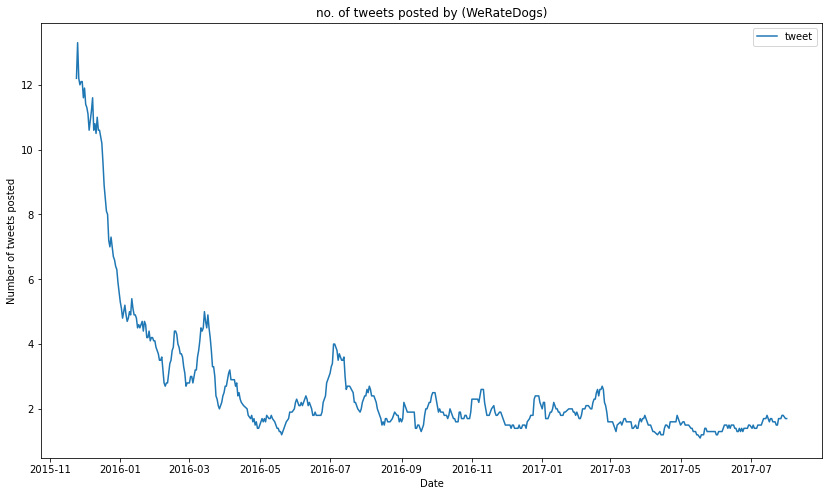

In [85]:
# Create a new dataframe with 2 columns, grouped by date
df1 = df[['date', 'tweet']].groupby(['date']).sum()

# Use moving averages to smooth the line
df1['tweet'] = df1['tweet'].rolling(window=10).mean()

# Plot
df1.plot(figsize=(14, 8), title='no. of tweets posted by (WeRateDogs)')
plt.ylabel('Number of tweets posted')
plt.xlabel('Date')
plt.show()